<a href="https://colab.research.google.com/github/jikkidian/public-agent/blob/main/MOUTON_ABM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1 - Baseline code from Benoit

<ipython-input-1-91abe696158b>:14: DeprecationWarning: Seeding based on hashing is deprecated
since Python 3.9 and will be removed in a subsequent version. The only 
supported seed types are: None, int, float, str, bytes, and bytearray.
  random.seed(datetime.now())


201


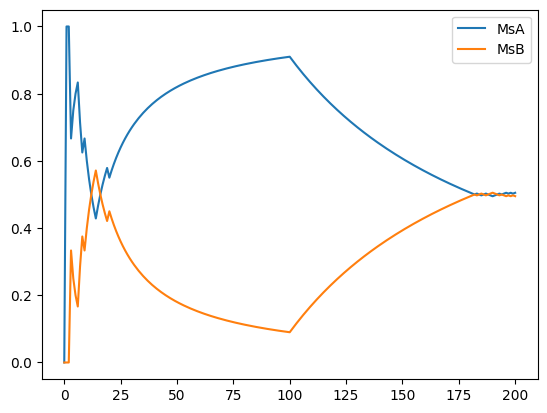

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Thu May 20 13:57:07 2021

@author: desmarchelier
"""

import random
import pandas as pd
from datetime import datetime
from copy import deepcopy
import math

random.seed(datetime.now())


class Agent:

    def __init__(self,Idx,a,rs,si,cv): #these are attributes or characteristics idx=index, a is the agent, rs is reseaux sociale, iscv is the information signal and cultural values gap
        self.Id=Idx
        self.a=a
        self.b=1-a#On norme a et b de telle sorte que a+b=1;
        self.rs=rs#parametre de rendement;
        self.Choice=0
        self.si=si #signale d'information (jacques addition)
        self.cv=cv #cultural values (jacques addition)

    def Choose(self,MsA,MsB):#MsA = part de marché du bien A, MsB = part de marché du bien B; (these are behaviors)
        Ua=self.a+self.rs*MsA
        Ub=self.b+self.rs*MsB

        if(Ua>Ub):
            self.Choice=1
        elif(Ub>Ua):
            self.Choice=2
        else:
            Rd1=random.uniform(0,1)
            if(Rd1>=0.5):
                self.Choice=1
            else:
                self.Choice=2






Population=[]
i=0#Compteur; iterator
Rd=0;#Sert à stocker les résultats de certains tirages aléatoires;
NbA=0 #Nb de fois que le bien A a été choisi
NbB=0 #Nb de fois que le bien B a été choisi
MsA=[]
MsB=[]


i=0
while i<100: #100 instances of agents in this array <- editing this number will dictate how many will be in the array
    Rd=random.uniform(0,1) #picks a random number between 0 and 1
    if(Rd>=0.5):
        Population.append(Agent(i,0.75,0.08,0.40,0.60)) # (jacques added 0.40 and 0.60)
    else:
        Population.append(Agent(i,0.25,0.08,0.40,0.60)) # (jacques added 0.40 and 0.60)
    i+=1

MsA.append(0)
MsB.append(0)
i=0
while i<len(Population):
    #Population[i].Choose(MsA[i],MsB[i])
    Population[i].Choose(NbA,NbB)
    if (Population[i].Choice==1):
        NbA+=1
    else:
        NbB+=1
    #print("Population[i].Choice =",Population[i].Choice," NbA=",NbA," NbB=",NbB)
    MsA.append(NbA/(NbA+NbB))
    MsB.append(NbB/(NbA+NbB))
    i+=1

'''
Deuxième période : on rends les rendements décroissants et on relance le modèle une seconde fois.
'''
i=0
while(i<len(Population)):
    Population[i].rs=-0.4
    i+=1
i=0
while i<len(Population):
    #Population[i].Choose(MsA[i],MsB[i])
    Population[i].Choose(NbA,NbB)
    if (Population[i].Choice==1):
        NbA+=1
    else:
        NbB+=1
    #print("Population[i].Choice =",Population[i].Choice," NbA=",NbA," NbB=",NbB)
    MsA.append(NbA/(NbA+NbB))
    MsB.append(NbB/(NbA+NbB))
    i+=1
print(len(MsA))
i=0

DF=pd.DataFrame()
DF.insert(len(DF.columns),"MsA",MsA)
DF.insert(len(DF.columns),"MsB",MsB)
Graph=DF.plot()

# 👎 Section 2 Strength of Information Signal and Cultural Values





**IMPORTANT NOTE** - *After working on this code for several weeks, I realized that I needed to refactor it at a higher level. I opted to keep this section in the Colab, noting that it is not lost, though the section 2 below is the prefered section 2 which was used to build section 3. The learning that this would not work came to my understanding when I realized that I wanted to look at cultural values in a range in a way similar to tradition and modernity. A group of people is often not purely homogenous, or thinking in single way. Based on the learnings from Enrico Diecidue, decisions are usually made within a range, especially the best decisions, so allowing for the agents to have some free will in this process is what led to the creation of the newer or changed code in the section below*



---




**Section 2** - Below is the code established on top of the baseline created by Benoit Desmarchelier. As per discussions had in person on January 13th, 2024, part 2 of this work will look at the effect of information signals and cultural values as a component of decision making. For example differences between China and France and how contention is measured, managed. The literature that drives this is a book chapter on the French and Chinese revolutions in the "Dynamics of Contention." Think about social movements, strikes, revolutions, and democratization. After working on the code for some time and trying to establish how to best represent to variations of interest per parameter, it was found that writing the code such that a range would used in conjuction with "random" would best allow for the various isolations, although allowing for increased complexity to more accurately represent a given culture, community, people group, or otherwise.



---


References:

1.    Watts, D., Strogatz, S. Collective dynamics of ‘small-world’ networks. Nature 393, 440–442 (1998). https://doi.org/10.1038/30918

2.    Dynamic diffusion in evolutionary optimised networks - Takanori Komatsu and Akira Namatame, November 14, 2011pp 384-392 https://doi.org/10.1504/IJBIC.2011.043608

3.    Agent-based Modeling for the Study of Diffusion Dynamics - Akira Namatame, Kazuyuki Matsuyama; Dept. of Computer Science, National Defense Academy, Japan
www.nda.ac.jp/~nama - https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=b63a3e0aecbd76b3384eba3d196151a28e90070d

4.    book chapter on the French and Chinese revolutions in the "Dynamics of Contention."

301


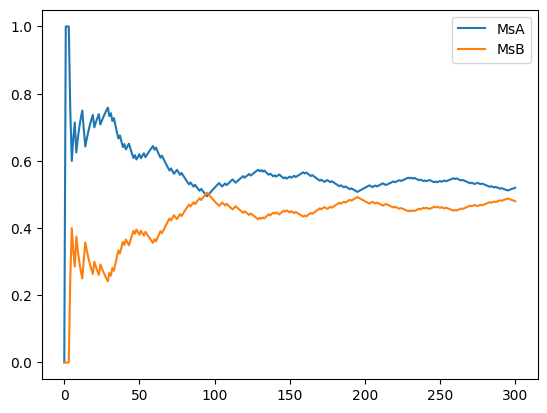

In [ ]:
#July 15th, 2024
# addition of Distance between information signal and cultural values
#additional reading - https://pypi.org/project/multi-agent-decision/


import random
import pandas as pd
from datetime import datetime
from copy import deepcopy
import math

random.seed(datetime.now().timestamp())


class Agent:

    def __init__(self,Idx,a,rs,si,cv): #these are attributes or characteristics idx=index, a is the agent, rs is reseaux sociale, iscv is the information signal and cultural values gap
        self.Id=Idx
        self.a=a
        self.b=1-a#On norme a et b de telle sorte que a+b=1;
        self.rs=rs#parametre de rendement;
        self.Choice=0
        self.si=si #signale d'information - This value indicates how much the agent is influenced by information about the options. It can range from 0 (no influence) to higher values (strong influence).
        self.cv=cv #cultural values This value represents the difference between the agent's values and the dominant cultural values. It can be positive, negative, or zero, reflecting different levels of alignment or misalignment with the prevailing culture.

    def Choose(self,MsA,MsB):#MsA = part de marché du bien A, MsB = part de marché du bien B; (these are behaviors)
        Ua=self.a+self.rs*self.si*MsA*self.cv
        Ub=self.b+self.rs*self.si*MsB*self.cv

        if(Ua>Ub):
            self.Choice=1
        elif(Ub>Ua):
            self.Choice=2
        else:
            Rd1=random.uniform(0,1)
            if(Rd1>=0.5):
                self.Choice=1
            else:
                self.Choice=2






Population=[]
i=0#Compteur; iterator
Rd=0;#Sert à stocker les résultats de certains tirages aléatoires;
NbA=0 #Nb de fois que le bien A a été choisi
NbB=0 #Nb de fois que le bien B a été choisi
MsA=[]
MsB=[]


i=0
while i<100: #100 instances of agents in this array <- editing this number will dictate how many will be in the array
    Rd=random.uniform(0,1) #picks a random number between 0 and 1
    if(Rd>=0.5):
        Population.append(Agent(i,0.75,0.08,0.40,0.60))
    else:
        Population.append(Agent(i,0.25,0.08,0.40,0.60))
    i+=1

#{'tradition': 0.6, 'indifferent': 0.3, 'modernity': 0.1} Cultural values with respect to tradition. Change based on culture and can be mirrored by the scaled of cultural looseness or tightness.

MsA.append(0)
MsB.append(0)
i=0
while i<len(Population):
    #Population[i].Choose(MsA[i],MsB[i])
    Population[i].Choose(NbA,NbB)
    if (Population[i].Choice==1):
        NbA+=1
    else:
        NbB+=1
    #print("Population[i].Choice =",Population[i].Choice," NbA=",NbA," NbB=",NbB)
    MsA.append(NbA/(NbA+NbB))
    MsB.append(NbB/(NbA+NbB))
    i+=1

'''
Deuxième période : on rends les rendements décroissants et on relance le modèle une seconde fois.
'''
i=0
while(i<len(Population)):
    Population[i].rs=-0.08
    Population[i].Choose(NbA,NbB)
    if (Population[i].Choice==1):
        NbA+=1
    else:
        NbB+=1
      #print("Population[i].Choice =",Population[i].Choice," NbA=",NbA," NbB=",NbB)
    MsA.append(NbA/(NbA+NbB))
    MsB.append(NbB/(NbA+NbB))
    i+=1
i=0
while i<len(Population):
    #Population[i].Choose(MsA[i],MsB[i])
    Population[i].si=0.01
    Population[i].cv=0.01
    Population[i].Choose(NbA,NbB)
    if (Population[i].Choice==1):
        NbA+=1
    else:
        NbB+=1
    #print("Population[i].Choice =",Population[i].Choice," NbA=",NbA," NbB=",NbB)
    MsA.append(NbA/(NbA+NbB))
    MsB.append(NbB/(NbA+NbB))
    i+=1
print(len(MsA))
i=0

DF=pd.DataFrame()
DF.insert(len(DF.columns),"MsA",MsA)
DF.insert(len(DF.columns),"MsB",MsB)
Graph=DF.plot()

# 😀 Section 2 Version 2 with random defined range for SI and CV

---



**IMPORTANT NOTE** *This is the section 2 in which the code was decided to be built upon rather than the code above. I opted to keep the above code in the colab for historical reasons*


---


**Section 2 with Random for SI and CV**

When reviewing different methods to solve for this problem, it was considered whether or not to hard code the information signal strength and the cultural values. In the end, it was found that have a range would be more accurate to be able to differentiate for various cultures and how different signals have different strengths, even within a culture, based on generations (this mimics free will and range of choice in some way). Similarly, with cultural values, some cultures are tight while others are loose. And, within that tightness and looseness, there can be a range within a range, as a result, there can be multiple models run to simulate varying cultures and subcultures, as compared to hard coding these parameters.



---



**Sources used to increase understanding and generate ideas: **

1. Tightness—looseness across the 50 united states
https://www.jstor.org/stable/23775881

2. Uncertainty Modelling in Multi-agent Information Fusion Systems
https://dl.acm.org/doi/abs/10.5555/3398761.3398933

Work to be completed:

1.   Create an outline for a paper associated with this code.

2.   Determine if there is a way to do the writing in colab so all the information can be presented seemlessly rather than in multiple locations.
3.   Determine if it is possible to create a webpage to publish the papers





301
          MsA       MsB
100  0.640000  0.360000
101  0.633663  0.366337
102  0.637255  0.362745
103  0.640777  0.359223
104  0.644231  0.355769
..        ...       ...
196  0.612245  0.387755
197  0.609137  0.390863
198  0.611111  0.388889
199  0.613065  0.386935
200  0.610000  0.390000

[101 rows x 2 columns]
          MsA       MsB
199  0.613065  0.386935
200  0.610000  0.390000
201  0.606965  0.393035
202  0.603960  0.396040
203  0.600985  0.399015
..        ...       ...
296  0.500000  0.500000
297  0.498316  0.501684
298  0.500000  0.500000
299  0.501672  0.498328
300  0.503333  0.496667

[102 rows x 2 columns]
Note: pay special attention to the range on the Y axis. It will cause the data to appear differently in the plot. Double check the actual data by looking at the data in the data frame


<Axes: >

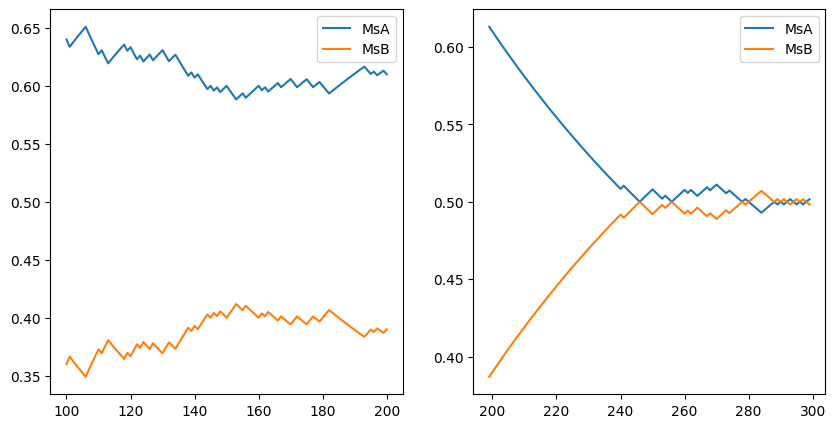

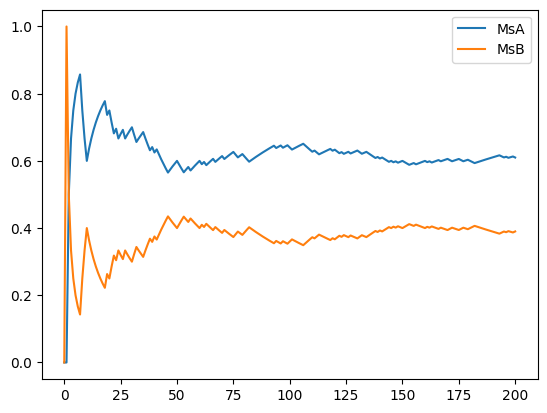

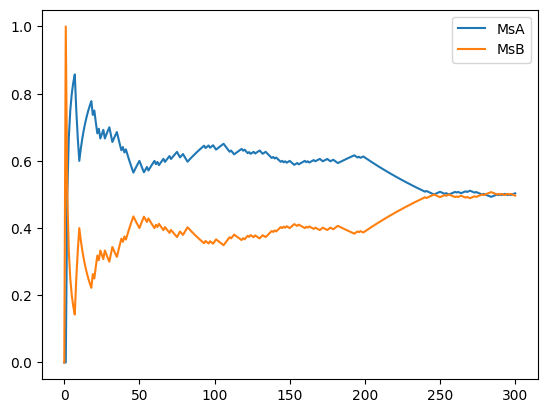

In [ ]:

#addition of new graphical break outs
#additionl of ranges

import random
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from copy import deepcopy
import math

random.seed(datetime.now().timestamp())

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) #this is for the ability to plot data side by side to make comparisons.


class Agent:

    def __init__(self,Idx,a,rs,si,cv): #these are attributes or characteristics idx=index, a is the agent, rs is reseaux sociale, iscv is the information signal and cultural values gap
        self.Id=Idx
        self.a=a
        self.b=1-a#On norme a et b de telle sorte que a+b=1;
        self.rs=rs#parametre de rendement;
        self.Choice=0
        self.si=si #signale d'information - This value indicates how much the agent is influenced by information about the options. It can range from 0 (no influence) to higher values (strong influence).
        self.cv=cv #cultural values This value represents the difference between the agent's values and the dominant cultural values. It can be positive, negative, or zero, reflecting different levels of alignment or misalignment with the prevailing culture.

    def Choose(self,MsA,MsB):#MsA = part de marché du bien A, MsB = part de marché du bien B; (these are behaviors)
        Ua=self.a+self.rs*self.si*MsA*self.cv
        Ub=self.b+self.rs*self.si*MsB*self.cv

        if(Ua>Ub):
            self.Choice=1
        elif(Ub>Ua):
            self.Choice=2
        else:
            Rd1=random.uniform(0,1)
            if(Rd1>=0.5):
                self.Choice=1
            else:
                self.Choice=2



Population=[]
i=0#Compteur; iterator
Rd=0;#Sert à stocker les résultats de certains tirages aléatoires;
NbA=0 #Nb de fois que le bien A a été choisi
NbB=0 #Nb de fois que le bien B a été choisi
MsA=[]
MsB=[]


i=0
while i < 100:
    Rd = random.uniform(0, 1)
    rs = random.uniform(0.075, 0.085) #Generates random rs value. This is chosen because the social network of a person has different levels of influence for each person. A narrower range dictates the sameness of a culture. Closer to zero indicates stubbornness.
    si = random.uniform(0, 1)  # Generate random si between 0 and 1 this was chosen to be random within a range to account for differences in preferences per information signal
    cv = random.uniform(-1, 1)  # Generate random cv between -1 and 1 this was chosen to be random within a range to account for differences in preferences per culture
    if Rd >= 0.5:
        Population.append(Agent(i, 0.75, rs, si, cv))
    else:
        Population.append(Agent(i, 0.25, rs, si, cv))
    i += 1

#{'tradition': 0.6, 'indifferent': 0.3, 'modernity': 0.1} Cultural values with respect to tradition. Change based on culture and can be mirrored by the scaled of cultural looseness or tightness.

MsA.append(0)
MsB.append(0)
i=0
while i<len(Population):
    #Population[i].Choose(MsA[i],MsB[i])
    Population[i].Choose(NbA,NbB)
    if (Population[i].Choice==1):
        NbA+=1
    else:
        NbB+=1
    #print("Population[i].Choice =",Population[i].Choice," NbA=",NbA," NbB=",NbB)
    MsA.append(NbA/(NbA+NbB))
    MsB.append(NbB/(NbA+NbB))
    i+=1

'''
Deuxième période : on rends les rendements décroissants et on relance le modèle une seconde fois.
'''
i=0
while(i<len(Population)):
    Population[i].rs=random.uniform(.03, 0.05)
    Population[i].Choose(NbA,NbB)
    if (Population[i].Choice==1):
        NbA+=1
    else:
        NbB+=1
      #print("Population[i].Choice =",Population[i].Choice," NbA=",NbA," NbB=",NbB)
    MsA.append(NbA/(NbA+NbB))
    MsB.append(NbB/(NbA+NbB))
    i+=1
DF=pd.DataFrame()
DF.insert(len(DF.columns),"MsA",MsA)
DF.insert(len(DF.columns),"MsB",MsB)
Graph=DF.plot()

i=0
while i<len(Population):
    #Population[i].Choose(MsA[i],MsB[i])
    Population[i].si=random.uniform(0, 10)
    Population[i].cv=random.uniform(-1, -0.4)
    Population[i].Choose(NbA,NbB)
    if (Population[i].Choice==1):
        NbA+=1
    else:
        NbB+=1
    #print("Population[i].Choice =",Population[i].Choice," NbA=",NbA," NbB=",NbB)
    MsA.append(NbA/(NbA+NbB))
    MsB.append(NbB/(NbA+NbB))
    i+=1
print(len(MsA))
i=0

DF2=pd.DataFrame()
DF2.insert(len(DF2.columns),"MsA",MsA)
DF2.insert(len(DF2.columns),"MsB",MsB)
Graph=DF2.plot()

print(DF.iloc[100:201])
print(DF2.iloc[199:301])

print("Note: pay special attention to the range on the Y axis. It will cause the data to appear differently in the plot. Double check the actual data by looking at the data in the data frame")
DF.iloc[100:201].plot(ax=ax1, label='DF')  # Plot a range around the transition in DF
DF2.iloc[199:300].plot(ax=ax2, label='DF2') # Plot a range around the transition in DF2

# 😀 Section 3 Trust and Authority of Information Sources and Influence of Neighbors

**Section 3** This section builds on the previous section, with the addition of trust and authority of information sources. Examples include things like news sources (one a person follows versus opposes) presidents or heads of states/organizations, and influential persons (actors, athletes, social media). Trust and authority as was done in section 2 for information signal and cultural values, is added to this code with ranges. The reason for ranges is that within a given population, a group would align various levels of trust and authority to a given person, which can be seen even within a family. A child may give authority to both parents, but more to one than another. Having multiple children in the same household, the range of authority given to each parent by each child will differ, even if it is to a small degree. Adding in ranges accounts for this. Similary, when it comes to trust. However, when it comes to trust, it is possible to distrust someone, or assign a negative trust value to a given person. Let's say there is one person in a family or a group who is know as the "liar", they would be assigned the negative trust value, but perhaps in a range of neutral (close to zero) to marginally negative (0.09). We can also apply this thinking to things like elections and trust placed on a given candidates words as shown through polling or other data.

Initially, I had trust and authority as factors individually calculate against all the other factors. However, after some thought it was decided that trust and authority are more appropriately defined as factors acting against the information signal primarily. This led to the creation of TA in the below definitions to be used in the choice or choose process. trust level can be positive or negative (-1,1) while authority can be only positive (0,1). These two numbers are then added together and divided by two to get an average with the total always being between (-1,1).

In addition to the above, I thought it would also be important to include influence as imposed by neighbors in this section. This may or may not need to considered as a single section. This was visualized by adding in the Contagion Based Influence diagram, which shows a visual how one person influences perhaps theirself and others. Influence, though currently not a pure range, is dependent on a baseline probability to be influenced. For stubborn or tight cultures, the assumed baseline probability will be close to 0 (zero) while a loose culture would suggest the basline would be closer to 1.

Data slices were added to the print out to show consistency of data across the two graphs, as the scales of the graphs change from one to another based on the section of concern.


---


My understanding of the code is that decisions happen by the agents iteratively. At point 0, agents are assigned a decision randomly and take their decisions at 100, 200, 300, and 400. This allows us to see how decision change over time based on the various additional parameters (and changes to those parameters) and changes made around the context of a decision or previous decisions.


---


Sources used to generate ideas and understanding:

Levels of Trust in Information Sources as a Predictor of Protective Health

1.   Behaviors During COVID-19 Pandemic: A UAE Cross-Sectional Study - https://www.frontiersin.org/journals/psychology/articles/10.3389/fpsyg.2021.633550/full
2.   Ideological Bias and Trust in Information Sources - https://web.stanford.edu/~gentzkow/research/trust.pdf
3.   Adaptive Agent Model Estimating Human Trust in Information Sources - https://dl.acm.org/doi/epdf/10.1109/WI-IAT.2009.195
4.   PyPI libraries -
https://pypi.org/search/?q=agent+based+modeling+influence+graph&o=
5.   National culture and innovation diffusion. Exploratory insights from agent-based modeling - https://www.sciencedirect.com/science/article/abs/pii/S0040162516000196
6.   Desmarchelier, B., Zhang, L. Innovation networks and cluster dynamics. Ann Reg Sci 61, 553–578 (2018). https://doi.org/10.1007/s00168-018-0882-5






301
This is the third decision in the series after having considered information signal and cultural values. Note, this may be a subconscious decision
401
          MsA       MsB
200  0.400000  0.600000
201  0.398010  0.601990
202  0.400990  0.599010
203  0.403941  0.596059
204  0.406863  0.593137
..        ...       ...
296  0.418919  0.581081
297  0.417508  0.582492
298  0.416107  0.583893
299  0.418060  0.581940
300  0.416667  0.583333

[101 rows x 2 columns]
          MsA       MsB
299  0.418060  0.581940
300  0.416667  0.583333
301  0.415282  0.584718
302  0.417219  0.582781
303  0.419142  0.580858
..        ...       ...
396  0.434343  0.565657
397  0.433249  0.566751
398  0.432161  0.567839
399  0.433584  0.566416
400  0.432500  0.567500

[102 rows x 2 columns]
Note: pay special attention to the range on the Y axis. It will cause the data to appear differently in the plot. Double check the actual data by looking at the data in the data frame
This is the new output of the decisio

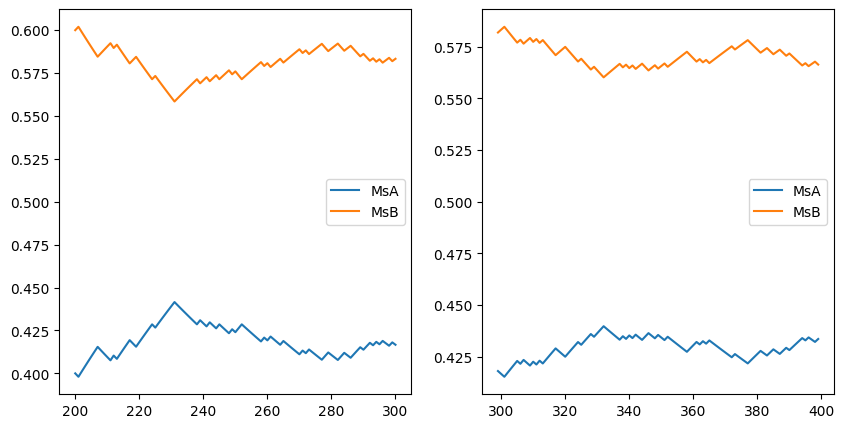

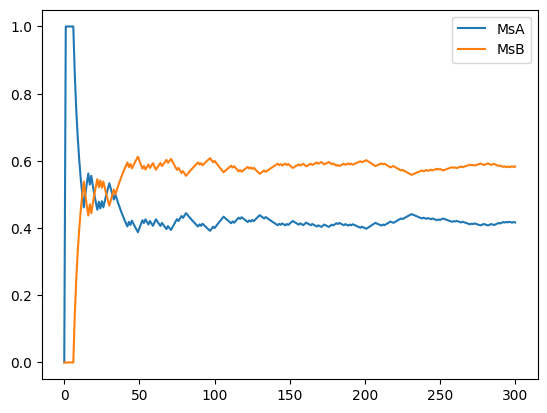

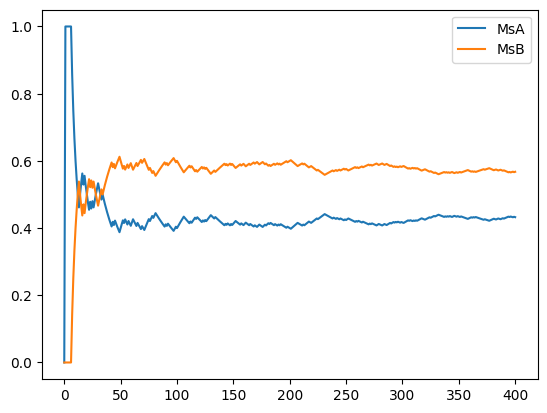

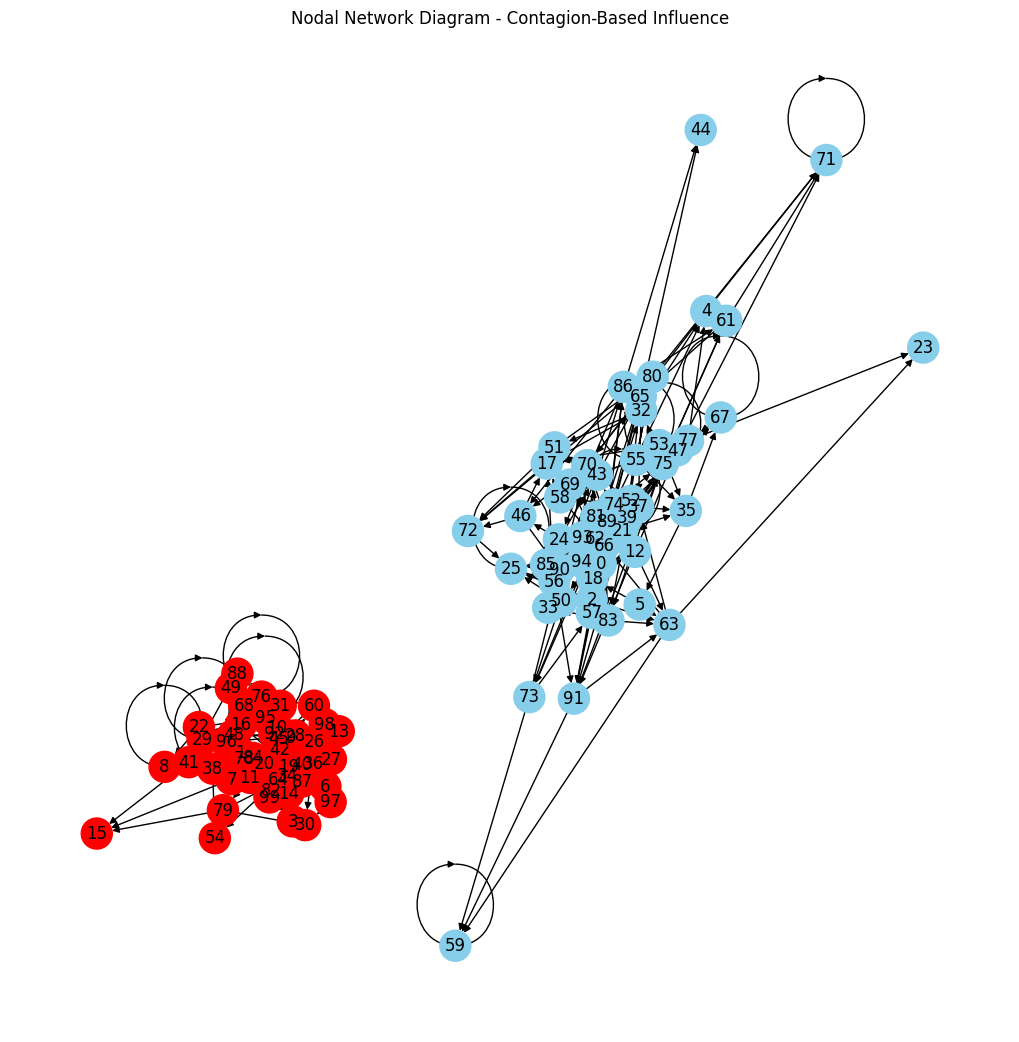

In [ ]:
#July 21, 2024
# addition of Distance between information signal and cultural values
#Trust and the authority of where the information comes from (news, president, influencers) How do we model this?
#August 2024
#addition of nodal contagion
#addition of nodal graph



import random
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from copy import deepcopy
import math
import networkx as nx

#creates a directed graph
graph = nx.DiGraph()


random.seed(datetime.now().timestamp())

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) #this is for the ability to plot data side by side to make comparisons.


class Agent:

    def __init__(self,Idx,a,rs,si,cv,trust,authority): #these are attributes or characteristics idx=index, a is the agent, rs is reseaux sociale, iscv is the information signal and cultural values gap
        self.Id=Idx
        self.a=a
        self.b=1-a#On norme a et b de telle sorte que a+b=1;
        self.rs=rs#parametre de rendement;
        self.Choice=0
        self.si=si #signale d'information - This value indicates how much the agent is influenced by information about the options. It can range from 0 (no influence) to higher values (strong influence).
        self.cv=cv #cultural values This value represents the difference between the agent's values and the dominant cultural values. It can be positive, negative, or zero, reflecting different levels of alignment or misalignment with the prevailing culture.
        self.trust=trust #Trust in the information source.
        self.authority=authority #Authority of the information source.

    def Choose(self,MsA,MsB):#MsA = part de marché du bien A, MsB = part de marché du bien B; (these are behaviors)
        TA=(self.trust+self.authority)/2 #TA represents trust and authority calculation based on the range preset. This is a recent improvement to better show the inpact of trust and authorty as a factor acting on the information signal rather than in isolation
        Ua=self.a+self.rs*self.si*MsA*self.cv*TA
        Ub=self.b+self.rs*self.si*MsB*self.cv*TA #Need to investigate what happens when negative times a negative to create a positive factor for TA. Based on calculations, it seems that I need to only permit trust include a negative calculation, otherwise we would result in a
                                                  #time a negative resulting in a positive effect, which may result in a favorable result being displayed or cascaded when it should be a compounded negative effect.


        if(Ua>Ub):
            self.Choice=1
        elif(Ub>Ua):
            self.Choice=2
        else:
            Rd1=random.uniform(0,1)
            if(Rd1>=0.5):
                self.Choice=1
            else:
                self.Choice=2

    def influence(self):
        for neighbor in self.neighbors:
          influence_probability = 0.75 * self.trust * self.authority  # modify the first number in this line to edit the base influence probability to reflect the understanding as it is in one network versus another.
          if random.uniform(0, 1) < influence_probability:
            neighbor.Choice = self.Choice



Population=[]
i=0#Compteur; iterator
Rd=0;#Sert à stocker les résultats de certains tirages aléatoires;
NbA=0 #Nb de fois que le bien A a été choisi
NbB=0 #Nb de fois que le bien B a été choisi
MsA=[]
MsB=[]


i=0
while i < 100:
    Rd = random.uniform(0, 1)
    rs = random.uniform(0, 1) #Generates random rs value. This is chosen because the social network of a person has different levels of influence for each person. A narrower range dictates the sameness of a culture. Closer to zero indicates stubbornness.
    si = random.uniform(0, 1)  # Generate random si between 0 and 1 this was chosen to be random within a range to account for differences in preferences per information signal
    cv = random.uniform(-1, 1)  # Generate random cv between -1 and 1 this was chosen to be random within a range to account for differences in preferences per culture
    trust = random.uniform(-1, 1)  # Generate random trust between -1 and 1 this was chosen to be random within a range to account for differences in preferences per culture
    authority = random.uniform(0, 1) #Genereates randon authority level for the range.
    if Rd >= 0.5:
        Population.append(Agent(i, 0.75, rs, si, cv, trust, authority))
    else:
        Population.append(Agent(i, 0.25, rs, si, cv, trust, authority))
    i += 1

#{'tradition': 0.6, 'indifferent': 0.3, 'modernity': 0.1} Cultural values with respect to tradition. Change based on culture and can be mirrored by the scaled of cultural looseness or tightness.

MsA.append(0)
MsB.append(0)

for agent in Population:
    agent.neighbors = random.sample(Population, 5)

i=0
while i<len(Population):
    #Population[i].Choose(MsA[i],MsB[i])
    Population[i].Choose(NbA,NbB)
    if (Population[i].Choice==1):
        NbA+=1
    else:
        NbB+=1
    #print("Population[i].Choice =",Population[i].Choice," NbA=",NbA," NbB=",NbB)
    MsA.append(NbA/(NbA+NbB))
    MsB.append(NbB/(NbA+NbB))
    i+=1

# New loop for influence
for agent in Population:
    agent.influence()

'''
Deuxième période : on rends les rendements décroissants et on relance le modèle une seconde fois.
'''
i=0
while(i<len(Population)):
    Population[i].rs=random.uniform(.03, 0.05)
    Population[i].Choose(NbA,NbB)
    if (Population[i].Choice==1):
        NbA+=1
    else:
        NbB+=1
      #print("Population[i].Choice =",Population[i].Choice," NbA=",NbA," NbB=",NbB)
    MsA.append(NbA/(NbA+NbB))
    MsB.append(NbB/(NbA+NbB))
    i+=1

    # New loop for influence
for agent in Population:
    agent.influence()
i=0
while i<len(Population):
    #Population[i].Choose(MsA[i],MsB[i])
    Population[i].si=random.uniform(0, 10)
    Population[i].cv=random.uniform(-1, 1)
    Population[i].Choose(NbA,NbB)
    if (Population[i].Choice==1):
        NbA+=1
    else:
        NbB+=1
    #print("Population[i].Choice =",Population[i].Choice," NbA=",NbA," NbB=",NbB)
    MsA.append(NbA/(NbA+NbB))
    MsB.append(NbB/(NbA+NbB))
    i+=1

    # New loop for influence
for agent in Population:
    agent.influence()

print(len(MsA))
i=0

DF=pd.DataFrame()
DF.insert(len(DF.columns),"MsA",MsA)
DF.insert(len(DF.columns),"MsB",MsB)
Graph=DF.plot()

#print(DF.iloc[200:301])
#DF.iloc[200:301].plot()

print("This is the third decision in the series after having considered information signal and cultural values. Note, this may be a subconscious decision")


i=0
while i<len(Population):
    #Population[i].Choose(MsA[i],MsB[i])
    Population[i].trust=random.uniform(.18, 1)
    Population[i].authority=random.uniform(.45, 1)
    Population[i].Choose(NbA,NbB)
    if (Population[i].Choice==1):
        NbA+=1
    else:
        NbB+=1
    #print("Population[i].Choice =",Population[i].Choice," NbA=",NbA," NbB=",NbB)
    MsA.append(NbA/(NbA+NbB))
    MsB.append(NbB/(NbA+NbB))
    i+=1

    # New loop for influence
for agent in Population:
    agent.influence()

print(len(MsA))
i=0

DF2=pd.DataFrame()
DF2.insert(len(DF2.columns),"MsA",MsA)
DF2.insert(len(DF2.columns),"MsB",MsB)
Graph=DF2.plot()

print(DF.iloc[200:301])
print(DF2.iloc[299:401])
#DF2.iloc[300:401].plot()
#DF.iloc[200:301].plot(ax=ax1)
#DF2.iloc[301:402].plot(ax=ax2)
print("Note: pay special attention to the range on the Y axis. It will cause the data to appear differently in the plot. Double check the actual data by looking at the data in the data frame")
DF.iloc[200:301].plot(ax=ax1, label='DF')  # Plot a range around the transition in DF
DF2.iloc[299:400].plot(ax=ax2, label='DF2') # Plot a range around the transition in DF2

print("This is the new output of the decision after making a decision with changed trust level and authority level of the information source.")

plt.show()


# Add nodes for each agent
for agent in Population:
    graph.add_node(agent.Id)

# Add edges based on neighbor relationships and influence
for agent in Population:
    for neighbor in agent.neighbors:
        if agent.Choice == neighbor.Choice:  # Add edge if influence was successful
            graph.add_edge(agent.Id, neighbor.Id)

# Assign colors to nodes based on choices
for agent in Population:
  if agent.Choice == 1:
    graph.nodes[agent.Id]['color'] = 'red'
  else:
    graph.nodes[agent.Id]['color'] = 'skyblue'

# Get color list for drawing
node_colors = [data['color'] for _, data in graph.nodes(data=True)]

# Draw the graph using assigned colors
plt.figure(figsize=(10, 10))  # Adjust the width and height as needed
nx.draw(graph, with_labels=True, node_size=500, node_color=node_colors)
plt.title("Nodal Network Diagram - Contagion-Based Influence")
plt.show()



# ❓ ❓ Section 4 - Next step is to determine who the influencers are in the network and who the influenced are in the network. Can we figure out how to have the influencers change some of the decisions?